# A notebook to to get true and predicted CTann and RUI for HRApop atlas datasets


## Goal

See [this GitHub issue](https://github.com/x-atlas-consortia/hra-pop/issues/100)


## Import libraries


In [64]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pprint import pprint
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
import hra_api_client

from hra_api_client.api import v1_api as default_api
from hra_api_client.models.sparql_query_request import SparqlQueryRequest

Configure HRA API client and create API instance

In [66]:
# may need to remove `v1`
configuration = hra_api_client.Configuration(
    host="https://apps.humanatlas.io/api"
)

api_client = hra_api_client.ApiClient(configuration)
api_instance = default_api.V1Api(api_client)

## Set global variables


In [67]:
hra_pop_version = "v0.10.3"

## Load data


In [68]:
# df_x = pd.read_csv("data/validation-v7-ctann-rui.csv")
df_x = pd.read_csv(
  f"../../../hra-pop/output-data/{hra_pop_version}/reports/atlas/validation-v7-x-axis.csv")
df_y = pd.read_csv(
  f"../../../hra-pop/output-data/{hra_pop_version}/reports/atlas/validation-v7-y-axis.csv")

## Prepare data for visualization and visualize


In [69]:
df_x

,sex,sample,rui_location,dataset,tool,modality,organ,organId,datasetVsRuiSim
0,Female,https://doi.org/10.1126/science.abl4290#GTEX-1CAMS-5015-SM-HPJ3C_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1CAMS-5015-SM-HPJ3C,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.950079
1,Female,https://doi.org/10.1126/science.abl4290#GTEX-1MCC2-5013-SM-HPJ3D_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1MCC2-5013-SM-HPJ3D,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.944614
2,Female,https://doi.org/10.1126/science.abl4290#GTEX-1R9PN-5002-SM-HD2MC_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1R9PN-5002-SM-HD2MC,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.934930
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952
...,...,...,...,...,...,...,...,...,...
902,Male,https://entity.api.hubmapconsortium.org/entities/d3525d35f6d5ee3dc3186613b0ab1762,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d5-e5739fd8432c,https://entity.api.hubmapconsortium.org/entities/f412e76986c1012ea9589d545ed8f043,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703
903,Male,https://entity.api.hubmapconsortium.org/entities/06f84c2ac7e2b777781965980b9cb07d,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,https://entity.api.hubmapconsortium.org/entities/3ff97368165004ae9e3b799cef261a2a,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000
904,Male,https://entity.api.hubmapconsortium.org/entities/b3c28a468b99b89af6430e2b53f2557f,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,https://entity.api.hubmapconsortium.org/entities/4b3d4efca2e64a650e943c7bf63f9830,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475
905,Male,https://entity.api.hubmapconsortium.org/entities/734f394ab73a5b3974b394a366e48081,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a6-f972a70da51a,https://entity.api.hubmapconsortium.org/entities/578f1282276ddc1cc4c4817e4950f13c,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469


In [70]:
df_y

,sex,rui_location,dataset,tool,predicted_rui,similarity
0,Female,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D11$...,celltypist,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.441815
1,Female,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,https://entity.api.hubmapconsortium.org/entities/206d669d243f6dab04cc126a52cdab8d,azimuth,http://purl.org/ccf/1.5/731ade72-cdb7-4262-8be1-859396820dfd,0.792217
2,Female,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,https://doi.org/10.1126/science.abl4290#GTEX-13N11-5002-SM-H5JDV,popv,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.951883
3,Male,http://purl.org/ccf/1.5/886e391d-0151-46d3-8a51-084bf6a06910,https://entity.api.hubmapconsortium.org/entities/c6bb00096b0cf40751f9d6003fb730c7,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.957861
4,Male,http://purl.org/ccf/1.5/da28394d-789a-4fba-842a-f8ba5046b221,https://entity.api.hubmapconsortium.org/entities/21043afd6be7ec258f8a9fa1577c41b5,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.945847
...,...,...,...,...,...,...
927,Male,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,https://entity.api.hubmapconsortium.org/entities/faa1acc13943ee9d365b6cc6a3ea889f,popv,http://purl.org/ccf/1.5/fd4fcec2-93c3-428f-ad3a-6c7ac4196da0,0.925139
928,Male,http://purl.org/ccf/1.5/ca23f77c-a3cd-453f-bbe9-2d8d1514fc8e,https://entity.api.hubmapconsortium.org/entities/91cfb45f5d398e950ed65786c87f4372,azimuth,http://purl.org/ccf/1.5/1f414fc5-cb93-45b7-a1b8-0cd21dfa9f7d,0.855982
929,Male,http://purl.org/ccf/1.5/d662fd53-e925-4921-8d8b-bc91eed1519b,https://entity.api.hubmapconsortium.org/entities/84db9a72aba9ae0ef740192ad8747ee3,popv,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,0.991318
930,Male,http://purl.org/ccf/1.5/df0b33f7-371a-47a4-a636-a27db19bdbc9,https://entity.api.hubmapconsortium.org/entities/4348d5cf6485b949381a1c3358ab3f23,azimuth,http://purl.org/ccf/1.5/db35f27d-313f-4dd6-819b-375cf106aac1,0.911654


## Compute similarity scores for %AS


### Load atlas enriched dataset graph


In [71]:
ds_graph_path = f"../../../hra-pop/output-data/{hra_pop_version}/atlas-enriched-dataset-graph.jsonld"

with open(ds_graph_path) as f:
  graph = json.load(f)

### Define functions


In [72]:
def dict_to_vec(dict1: dict, dict2: dict):
  """Takes two dictionaries and returns a tuple of nornalized lists with values (0 if key not present)

  Args:
    dict1 (dict): dictionary 1
    dict2 (dict): dictionary 2
  Returns:
    result (tuple): a tuple with normalized lists
  """

  # initialize result
  dict1_list = []
  dict2_list = []

  # handle shared keys
  shared_keys = set(dict1['collisions'].keys()).intersection(
    dict2['collisions'].keys())

  for key in shared_keys:
    dict1_list.append(dict1['collisions'][key])
    dict2_list.append(dict2['collisions'][key])

  # handle not shared keys
  keys_in_dict1_not_in_dict2 = dict1.keys() - dict2.keys()
  for key in keys_in_dict1_not_in_dict2:
    dict1[key] = 0

  keys_in_dict2_not_in_dict1 = dict2.keys() - dict1.keys()
  for key in keys_in_dict2_not_in_dict1:
    dict1[key] = 0

  return (dict1_list, dict2_list)


def get_as_collision_items(iri: str, get_organ = False):
  """A function to get AS collision items for an IRI (extraction site) and return a dictionary with AS UBERON ID and intersection percentage of the extraction site. 
  This uses https://apps.humanatlas.io/api/#get-/v1/extraction-site to get the rui_location data given the IRI and https://apps.humanatlas.io/api/#post-/v1/collisions to get the collisions

  Args:
    iri (str): an IRI for an extraction site

  Returns:
    a dictionary with the IRI and a nested dictionary with collisions (ID and percentage) 
  """

  result = {

  }
  
 
  # get extraction site
  base_url_extraction_site = "https://apps.humanatlas.io/api/v1/extraction-site?iri="
  extraction_site = ""
  
  response = requests.get(base_url_extraction_site+iri)
  
  if response:
    extraction_site = json.loads(response.text)
  else:
    raise Exception(f"Non-success status code: {response.status_code}")
  
  # send extraction site to /collisions endpoints
  collisions = api_instance.collisions(extraction_site)
  for item in collisions:
    result[item['representation_of']] = item['percentage_of_tissue_block']
  if get_organ:
      result['organ'] = extraction_site['placement']['target']

  return result


def compute_cosine_similarity_by_as_percentage(iri_1: str, iri_2: str):
  """Takes two IRIs of extraction sites and returns the cosine similarity of their AS percentages

  Args:
          iri_1 (str): An IRI for an extraction site
          iri_2 (str): An IRI for an extraction site

Returns: 
          similarity (float): A cosine similarity
  """

  # Get AS collision items as dict
  dict1 = get_as_collision_items(iri_1)
  dict2 = get_as_collision_items(iri_2)

  # Get a combined set of all keys from both dictionaries
  all_keys = set(dict1.keys()).union(dict2.keys())

  # Create the two lists of values
  values1 = [dict1.get(key, 0) for key in all_keys]
  values2 = [dict2.get(key, 0) for key in all_keys]

  # Compute cosine similarity
  cosine_similarity_value = cosine_similarity([values1], [values2])

  return float(cosine_similarity_value[0][0])

### Loop through pairs of extraction sites (true and predicted) in validation and compute AS% similarity score


In [73]:
# Add a new column with the AS% cosine similarity
df_y['as_percentage_cosine_sim'] = df_y.apply(lambda row: compute_cosine_similarity_by_as_percentage(
  row['rui_location'], row['predicted_rui']), axis=1)

# Save to CSV for optinal inspection in external software
df_y.to_csv("output/df_y.csv")

# print for review inline
df_y

,sex,rui_location,dataset,tool,predicted_rui,similarity,as_percentage_cosine_sim
0,Female,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D11$...,celltypist,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.441815,0.532793
1,Female,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,https://entity.api.hubmapconsortium.org/entities/206d669d243f6dab04cc126a52cdab8d,azimuth,http://purl.org/ccf/1.5/731ade72-cdb7-4262-8be1-859396820dfd,0.792217,1.000000
2,Female,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,https://doi.org/10.1126/science.abl4290#GTEX-13N11-5002-SM-H5JDV,popv,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.951883,1.000000
3,Male,http://purl.org/ccf/1.5/886e391d-0151-46d3-8a51-084bf6a06910,https://entity.api.hubmapconsortium.org/entities/c6bb00096b0cf40751f9d6003fb730c7,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.957861,0.000000
4,Male,http://purl.org/ccf/1.5/da28394d-789a-4fba-842a-f8ba5046b221,https://entity.api.hubmapconsortium.org/entities/21043afd6be7ec258f8a9fa1577c41b5,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.945847,0.000000
...,...,...,...,...,...,...,...
927,Male,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,https://entity.api.hubmapconsortium.org/entities/faa1acc13943ee9d365b6cc6a3ea889f,popv,http://purl.org/ccf/1.5/fd4fcec2-93c3-428f-ad3a-6c7ac4196da0,0.925139,1.000000
928,Male,http://purl.org/ccf/1.5/ca23f77c-a3cd-453f-bbe9-2d8d1514fc8e,https://entity.api.hubmapconsortium.org/entities/91cfb45f5d398e950ed65786c87f4372,azimuth,http://purl.org/ccf/1.5/1f414fc5-cb93-45b7-a1b8-0cd21dfa9f7d,0.855982,0.000000
929,Male,http://purl.org/ccf/1.5/d662fd53-e925-4921-8d8b-bc91eed1519b,https://entity.api.hubmapconsortium.org/entities/84db9a72aba9ae0ef740192ad8747ee3,popv,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,0.991318,0.000000
930,Male,http://purl.org/ccf/1.5/df0b33f7-371a-47a4-a636-a27db19bdbc9,https://entity.api.hubmapconsortium.org/entities/4348d5cf6485b949381a1c3358ab3f23,azimuth,http://purl.org/ccf/1.5/db35f27d-313f-4dd6-819b-375cf106aac1,0.911654,1.000000


## Visualize


### Create combined DataFrame


In [74]:
# Merging on two columns (key1 and key2)
df_merged = pd.merge(
  df_x, df_y, on=['dataset', 'tool', 'rui_location', 'sex'], how='inner')

# rename similarity columns for plotting


df_merged = df_merged.rename(columns={
  "datasetVsRuiSim": "ctann_sim",
  # RUI (y axis) cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary (*except* its TRUE rui location)
  "similarity": "rui_sim_by_cell_summary",
  "as_percentage_cosine_sim": "rui_sim_as_percentage"
})

df_merged

,sex,sample,rui_location,dataset,tool,modality,organ,organId,ctann_sim,predicted_rui,rui_sim_by_cell_summary,rui_sim_as_percentage
0,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.917636,0.532793
1,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.925033,0.000000
2,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,popv,sc_transcriptomics,heart,UBERON:0000948,0.941554,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.971689,0.000000
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.933921,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.978646,0.000000
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.474365,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.916703,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Male,https://entity.api.hubmapconsortium.org/entities/d3525d35f6d5ee3dc3186613b0ab1762,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d5-e5739fd8432c,https://entity.api.hubmapconsortium.org/entities/f412e76986c1012ea9589d545ed8f043,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703,http://purl.org/ccf/1.5/dc29aac6-af08-4fa4-9d58-5cb1d93ee8dc,0.744706,0.000000
894,Male,https://entity.api.hubmapconsortium.org/entities/06f84c2ac7e2b777781965980b9cb07d,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,https://entity.api.hubmapconsortium.org/entities/3ff97368165004ae9e3b799cef261a2a,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,1.000000,0.000000
895,Male,https://entity.api.hubmapconsortium.org/entities/b3c28a468b99b89af6430e2b53f2557f,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,https://entity.api.hubmapconsortium.org/entities/4b3d4efca2e64a650e943c7bf63f9830,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475,http://purl.org/ccf/1.5/cc08d64c-5d75-4995-b3b0-00239a742184,0.998475,1.000000
896,Male,https://entity.api.hubmapconsortium.org/entities/734f394ab73a5b3974b394a366e48081,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a6-f972a70da51a,https://entity.api.hubmapconsortium.org/entities/578f1282276ddc1cc4c4817e4950f13c,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,0.913469,0.000000


### Subset data (if needed)

In [75]:
pd.options.display.max_colwidth = 100

# set subset to full df
df_subset = df_merged

# uncomment if not subsetting 
# df_subset = df_merged[(df_merged['rui_sim_as_percentage'] < 0.1)]
df_subset

,sex,sample,rui_location,dataset,tool,modality,organ,organId,ctann_sim,predicted_rui,rui_sim_by_cell_summary,rui_sim_as_percentage
0,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.917636,0.532793
1,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.925033,0.000000
2,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,popv,sc_transcriptomics,heart,UBERON:0000948,0.941554,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.971689,0.000000
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.933921,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.978646,0.000000
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.474365,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.916703,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Male,https://entity.api.hubmapconsortium.org/entities/d3525d35f6d5ee3dc3186613b0ab1762,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d5-e5739fd8432c,https://entity.api.hubmapconsortium.org/entities/f412e76986c1012ea9589d545ed8f043,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703,http://purl.org/ccf/1.5/dc29aac6-af08-4fa4-9d58-5cb1d93ee8dc,0.744706,0.000000
894,Male,https://entity.api.hubmapconsortium.org/entities/06f84c2ac7e2b777781965980b9cb07d,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,https://entity.api.hubmapconsortium.org/entities/3ff97368165004ae9e3b799cef261a2a,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,1.000000,0.000000
895,Male,https://entity.api.hubmapconsortium.org/entities/b3c28a468b99b89af6430e2b53f2557f,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,https://entity.api.hubmapconsortium.org/entities/4b3d4efca2e64a650e943c7bf63f9830,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475,http://purl.org/ccf/1.5/cc08d64c-5d75-4995-b3b0-00239a742184,0.998475,1.000000
896,Male,https://entity.api.hubmapconsortium.org/entities/734f394ab73a5b3974b394a366e48081,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a6-f972a70da51a,https://entity.api.hubmapconsortium.org/entities/578f1282276ddc1cc4c4817e4950f13c,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,0.913469,0.000000


### Build plot


Functions for making plots


In [76]:
def make_validation_scattergraph(x: float, y: float, palette: str, col: str, row: str, hue: str, x_label: str, y_label: str):
    """A wrapper function around a seaborn FacetGrid to make multiple versions of the validation scattergraph

    Args:
                    x (float): x-value
                    y (float): y-value
                    palette (str): Name for color palette
                    col (str): Column of facet grid
                    row (str): Row of facet grid
                    hue (str): Color for points
                    x_label (str): Label on x-axis
            y_label (str): Label on y-axis
    """

    # Create a custom color palette
    custom_palette = sns.color_palette(palette)

    # set font size
    sns.set_theme(font_scale=2)

    # Create FacetGrid
    g = sns.FacetGrid(
        df_subset,
        col=col,
        row=row,
        hue=hue,
        palette=custom_palette,
        height=5,
        aspect=2
    )

    # Set the style of the plot
    # Options: "white", "dark", "whitegrid", "darkgrid", "ticks"
    sns.set_style("whitegrid")

    # Create a scatter plot
    g.map(sns.scatterplot, x, y)

    # Set labels
    g.set(xlabel=x_label, ylabel=y_label)

    # Add a legend
    g.add_legend()

    # Show the plot
    plt.show()

### Data dictionary


| Axis             | Variable                | Explanation                                                                                                                                 |
| ---------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| x                | ctann_sim               | CTann (x axis) Cosine sim between TRUE cell summary of input dataset and PREDICTED cell summary of input RUI location (as computed by US 1) |
| y (cell summary) | rui_sim_by_cell_summary | RUI (y axis) cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary (_except_ its TRUE rui location) |
| y (AS%)          | rui_sim_as_percentage   | RUI (y axis) cosine sim between AS% of TRUE and PREDICTED rui (determined by cosine sim captured as `ruiVsTopPredictedRuiSim` in [this query](https://github.com/x-atlas-consortia/hra-pop/blob/main/queries/atlas/validation-v7-ctann-rui.rq)). Could also use `datasetVsRuiSim`, which is the sim between a dataset and its OWN rui location                                            
                                  |


### CTann vs RUI AS% similarity


In [77]:
# Correlation
stats = df_subset[['ctann_sim', 'rui_sim_as_percentage']]
stats.corr(min_periods=3)

,ctann_sim,rui_sim_as_percentage
ctann_sim,1.000000,0.214856
rui_sim_as_percentage,0.214856,1.000000


In [78]:
# Mean, STDDEV, min, etc.
stats.describe()

,ctann_sim,rui_sim_as_percentage
count,898.000000,898.000000
mean,0.832648,0.419575
std,0.159287,0.464818
min,0.117205,0.000000
25%,0.743555,0.000000
50%,0.886364,0.118469
75%,0.953453,1.000000
max,1.000000,1.000000


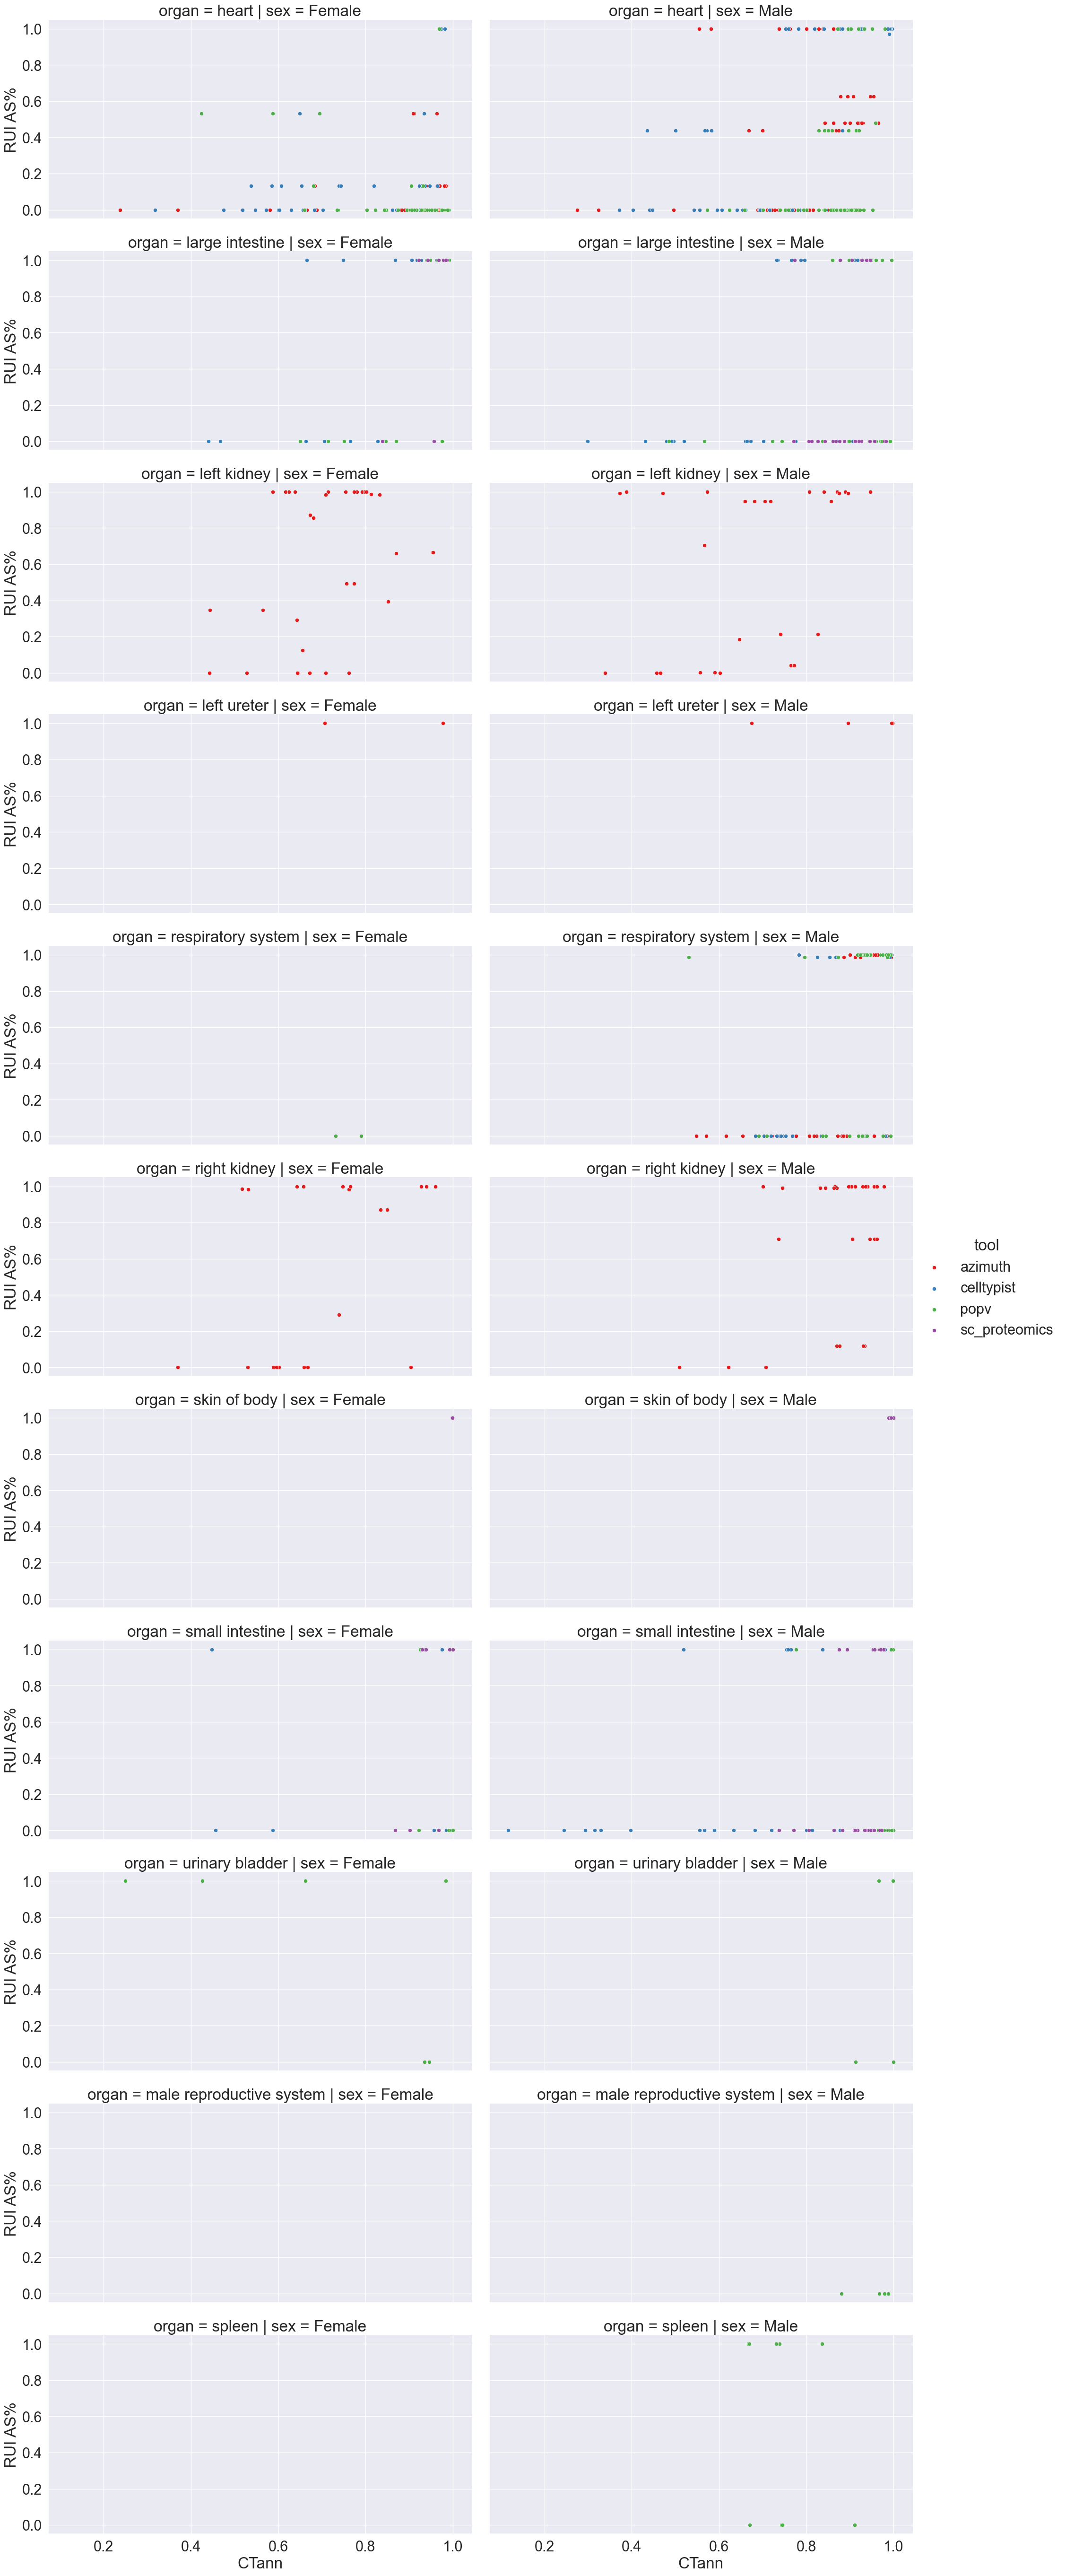

In [79]:
make_validation_scattergraph(
  "ctann_sim", "rui_sim_as_percentage", "Set1", "sex", "organ", "tool", "CTann", "RUI AS%")

## Investigate total intersection volume > 1.0

### Compute report with non-intersection volume per extraction site


See [https://github.com/x-atlas-consortia/hra-pop/issues/105](https://github.com/x-atlas-consortia/hra-pop/issues/105).
Need this format:
| extraction_site_id | total_intersection_percentage | number_of_AS_collisions | non_intersection_volume |
| --- | --- | --- | --- |
| IRI for extraction site | sum of percentages with all collision items | unique UBERON IDs/FMA IDs in mesh collisions| 1-total_intersection_percentage |


Get collision data for extraction site IRIs and get `organ`,	`total_intersection_percentage`,	`number_of_AS_collisions`,	`non_intersection_volume`

In [80]:
# initialize dict for result
result = {
  'iri' : [],
  'organ' : [],
  'colliding_as' : [],
  'total_intersection_percentage': [],
  'number_of_AS_collisions': [],
}

# get extraction site IRIs and then get AS intersections from HRA API
for iri in df_y['rui_location']:
  result['iri'].append(iri)
  collisions = get_as_collision_items(iri, get_organ=True)

  # fill result dicy
  keys = [key for key in collisions if key != 'organ']
  result['colliding_as'].append(keys)
  result['number_of_AS_collisions'].append(len(keys))
  
  # compute total intersection percentage
  total_percentage = 0
  for structure in collisions:
    if structure != 'organ':
      total_percentage += collisions[structure]
  result['total_intersection_percentage'].append(total_percentage)
  
  # add organ for visualization
  result['organ'].append(collisions['organ'])

Convert to DataFrame


In [81]:
df_intersections = pd.DataFrame(result)

df_intersections

,iri,organ,colliding_as,total_intersection_percentage,number_of_AS_collisions
0,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,http://purl.org/ccf/latest/ccf.owl#VHFHeart,[http://purl.obolibrary.org/obo/UBERON_0002084],0.914,1
1,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,http://purl.org/ccf/latest/ccf.owl#VHFLeftKidneyV1.1,[http://purl.obolibrary.org/obo/UBERON_0004200],1.000,1
2,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,http://purl.org/ccf/latest/ccf.owl#VHMHeart,[http://purl.obolibrary.org/obo/UBERON_0002078],0.402,1
3,http://purl.org/ccf/1.5/886e391d-0151-46d3-8a51-084bf6a06910,http://purl.org/ccf/latest/ccf.owl#VHMHeart,[http://purl.obolibrary.org/obo/UBERON_0002084],0.886,1
4,http://purl.org/ccf/1.5/da28394d-789a-4fba-842a-f8ba5046b221,http://purl.org/ccf/latest/ccf.owl#VHMHeart,[http://purl.obolibrary.org/obo/UBERON_0002084],0.886,1
...,...,...,...,...,...
927,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,http://purl.org/ccf/latest/ccf.owl#VHMLung,[http://purl.org/sig/ont/fma/fma7361],1.000,1
928,http://purl.org/ccf/1.5/ca23f77c-a3cd-453f-bbe9-2d8d1514fc8e,http://purl.org/ccf/latest/ccf.owl#VHMRightUreter,[http://purl.obolibrary.org/obo/UBERON_0001222],0.017,1
929,http://purl.org/ccf/1.5/d662fd53-e925-4921-8d8b-bc91eed1519b,http://purl.org/ccf/latest/ccf.owl#VHMLung,[http://purl.org/sig/ont/fma/fma7360],0.995,1
930,http://purl.org/ccf/1.5/df0b33f7-371a-47a4-a636-a27db19bdbc9,http://purl.org/ccf/latest/ccf.owl#VHMRightKidney,"[http://purl.obolibrary.org/obo/UBERON_0001284, http://purl.obolibrary.org/obo/UBERON_0002189]",1.000,2


Visualize

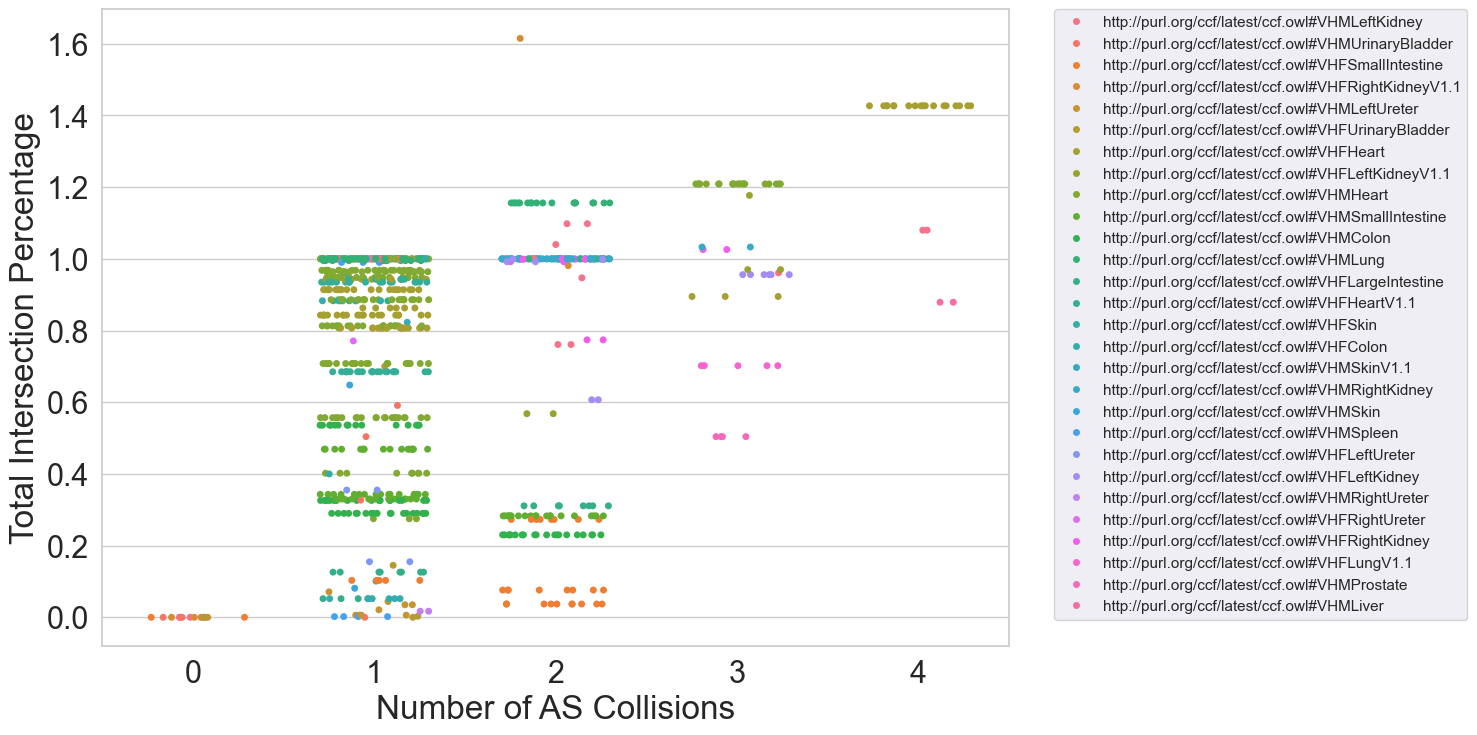

In [82]:
# Create a custom color palette
custom_palette = sns.color_palette("Dark2")

# define strip plot
g = sns.stripplot(data=df_intersections, x='number_of_AS_collisions',
                y='total_intersection_percentage', hue='organ', jitter=0.3)

# Set the style of the plot
# Options: "white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style("whitegrid")

# change width
sns.set_theme(rc={'figure.figsize': (11.7, 8.27)})

# Set labels
g.set(xlabel="Number of AS Collisions", ylabel="Total Intersection Percentage")

# Move legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()

With facet

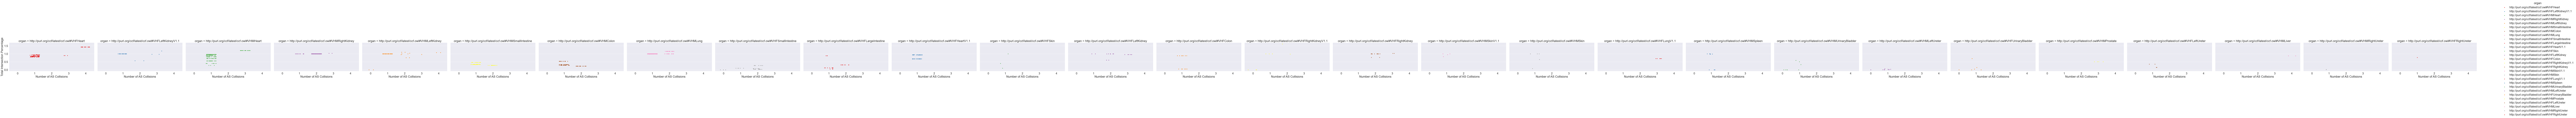

In [83]:
# Create a custom color palette
custom_palette = sns.color_palette("Set1")

# set font size
sns.set_theme(font_scale=2)

# Get order
categories_order = sorted(df_intersections['number_of_AS_collisions'].unique())

# Create FacetGrid
g = sns.FacetGrid(
    df_intersections,
    col='organ',
    hue='organ',
    palette=custom_palette,
    height=5,
    aspect=2
)

# Set the style of the plot
# Options: "white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style("whitegrid")

# Create a scatter plot
g.map(sns.stripplot, 'number_of_AS_collisions',
      'total_intersection_percentage', jitter=0.3, order = categories_order)

# Set labels
g.set(xlabel="Number of AS Collisions", ylabel="Total Intersection Percentage")

# Add a legend
g.add_legend()

# Show the plot
plt.show()

## Follow the outliers

### Highest total intersection percentage

In [84]:
# get row with biggest total intersection percentage
max_row = df_intersections.loc[[df_intersections['total_intersection_percentage'].idxmax()]]
max_row



,iri,organ,colliding_as,total_intersection_percentage,number_of_AS_collisions
126,http://purl.org/ccf/1.5/4ae53bc8-b6da-4ba9-9030-a93ae44389b9,http://purl.org/ccf/latest/ccf.owl#VHFRightKidneyV1.1,"[http://purl.obolibrary.org/obo/UBERON_0008716, http://purl.obolibrary.org/obo/UBERON_0001284]",1.615,2


In [85]:
# get collisions for outlier extraction site
get_as_collision_items(
    max_row.iloc[0]['iri'])

{'http://purl.obolibrary.org/obo/UBERON_0008716': 0.796,
 'http://purl.obolibrary.org/obo/UBERON_0001284': 0.819}

The extraction site with IRI `http://purl.org/ccf/1.5/4ae53bc8-b6da-4ba9-9030-a93ae44389b9` intersects with
- [http://purl.obolibrary.org/obo/UBERON_0008716](http://purl.obolibrary.org/obo/UBERON_0008716), hilum of kidney, 0.796
- [http://purl.obolibrary.org/obo/UBERON_0001284](http://purl.obolibrary.org/obo/UBERON_0001284), renal column, 0.819

The collisions endpoint returns:
```json
[
  {
    "AS_volume": -3315.9891939667878,
    "id": "https://purl.humanatlas.io/ref-organ/kidney-female-right/v1.3#VH_F_hilum_of_kidney_R",
    "intersection_volume": 14.328000000000001,
    "is_closed": true,
    "label": "hilum of kidney",
    "node_name": "VH_F_hilum_of_kidney_R",
    "organ": "https___cdn.humanatlas.io_digital-objects_ref-organ_kidney-female-right_v1.3_assets_3d-vh-f-kidney-r",
    "percentage_of_AS": -0.004320882596984575,
    "percentage_of_tissue_block": 0.796,
    "representation_of": "http://purl.obolibrary.org/obo/UBERON_0008716",
    "tissue_volume": 18
  },
  {
    "AS_volume": 52517.21248501704,
    "id": "https://purl.humanatlas.io/ref-organ/kidney-female-right/v1.3#VH_F_renal_column_R",
    "intersection_volume": 14.741999999999999,
    "is_closed": true,
    "label": "renal column",
    "node_name": "VH_F_renal_column_R",
    "organ": "https___cdn.humanatlas.io_digital-objects_ref-organ_kidney-female-right_v1.3_assets_3d-vh-f-kidney-r",
    "percentage_of_AS": 0.000280707967967756,
    "percentage_of_tissue_block": 0.819,
    "representation_of": "http://purl.obolibrary.org/obo/UBERON_0001284",
    "tissue_volume": 18
  }
]
```

It has the following location:

![](data/outlier_extraction_site.png)

### All > 1.0

In [112]:
greather_than_1 = df_intersections[df_intersections['total_intersection_percentage'] > 1.0]

# inspect dataframe
greather_than_1

,iri,organ,colliding_as,total_intersection_percentage,number_of_AS_collisions
21,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,http://purl.org/ccf/latest/ccf.owl#VHFHeart,"[http://purl.obolibrary.org/obo/UBERON_0002094, http://purl.obolibrary.org/obo/UBERON_0002084, h...",1.427,4
27,http://purl.org/ccf/1.5/da60f474-614a-4e0a-adbe-521ba44c7bf0,http://purl.org/ccf/latest/ccf.owl#VHMLung,"[http://purl.org/sig/ont/fma/fma7361, http://purl.org/sig/ont/fma/fma7402]",1.156,2
32,http://purl.org/ccf/1.5/da60f474-614a-4e0a-adbe-521ba44c7bf0,http://purl.org/ccf/latest/ccf.owl#VHMLung,"[http://purl.org/sig/ont/fma/fma7361, http://purl.org/sig/ont/fma/fma7402]",1.156,2
56,http://purl.org/ccf/1.5/da60f474-614a-4e0a-adbe-521ba44c7bf0,http://purl.org/ccf/latest/ccf.owl#VHMLung,"[http://purl.org/sig/ont/fma/fma7361, http://purl.org/sig/ont/fma/fma7402]",1.156,2
75,http://purl.org/ccf/1.5/da60f474-614a-4e0a-adbe-521ba44c7bf0,http://purl.org/ccf/latest/ccf.owl#VHMLung,"[http://purl.org/sig/ont/fma/fma7361, http://purl.org/sig/ont/fma/fma7402]",1.156,2
...,...,...,...,...,...
831,http://purl.org/ccf/1.5/c07ec91d-9dbe-4132-a93c-b960895b009d,http://purl.org/ccf/latest/ccf.owl#VHMLeftKidney,"[http://purl.obolibrary.org/obo/UBERON_0004200, http://purl.obolibrary.org/obo/UBERON_0002189]",1.098,2
832,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,http://purl.org/ccf/latest/ccf.owl#VHFHeart,"[http://purl.obolibrary.org/obo/UBERON_0002094, http://purl.obolibrary.org/obo/UBERON_0002084, h...",1.427,4
866,http://purl.org/ccf/1.5/1d965182-bf13-4738-af05-72b817121959,http://purl.org/ccf/latest/ccf.owl#VHFRightKidney,"[http://purl.obolibrary.org/obo/UBERON_0004200, http://purl.obolibrary.org/obo/UBERON_0002189, h...",1.026,3
882,http://purl.org/ccf/1.5/cf4ba102-edf7-4fe4-bb1d-860cdf57609d,http://purl.org/ccf/latest/ccf.owl#VHMLeftKidney,"[http://purl.obolibrary.org/obo/UBERON_0002189, http://purl.obolibrary.org/obo/UBERON_0008716, h...",1.080,4


In [113]:
print(f'Number of unique extraction sites with total intersection percentage > 1.0: {len(greather_than_1['iri'].unique())}')

print(f'Number of datasets with total intersection percentage > 1.0: {
      len(greather_than_1)}')

Number of unique extraction sites with total intersection percentage > 1.0: 11
Number of datasets with total intersection percentage > 1.0: 70


In [106]:
# list IRIs for those extraction sites
greather_than_1['iri'].unique()

array(['http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc',
       'http://purl.org/ccf/1.5/da60f474-614a-4e0a-adbe-521ba44c7bf0',
       'http://purl.org/ccf/1.5/57bab703-98bd-4106-9160-af951a74e4df',
       'http://purl.org/ccf/1.5/fdb0d1f7-94d5-4628-b345-dbe4975966fd',
       'http://purl.org/ccf/1.5/4ae53bc8-b6da-4ba9-9030-a93ae44389b9',
       'http://purl.org/ccf/1.5/7f7fe1b0-d9f6-48c2-a304-2ea5874c7392',
       'http://purl.org/ccf/1.5/cf4ba102-edf7-4fe4-bb1d-860cdf57609d',
       'http://purl.org/ccf/1.5/c07ec91d-9dbe-4132-a93c-b960895b009d',
       'http://purl.org/ccf/1.5/f3f2fabb-6802-4fd4-920e-1914293db252',
       'http://purl.org/ccf/1.5/1d965182-bf13-4738-af05-72b817121959',
       'http://purl.org/ccf/1.5/70ad7ae6-c9af-4975-98e2-98c249e36ddd'],
      dtype=object)

###Example: `http://purl.org/ccf/1.5/7f7fe1b0-d9f6-48c2-a304-2ea5874c7392`

![](data/7f7fe1b0-d9f6-48c2-a304-2ea5874c7392.png)
![](data/7f7fe1b0-d9f6-48c2-a304-2ea5874c7392_2.png)

### Exploring OFF for hilum in MeshLab

Notes:
- Left: original HRA v2.1 hilum of the female, left kidney
- Right: OFF version from 
- Different number of vertices and faces
- Misplaced vertex? 

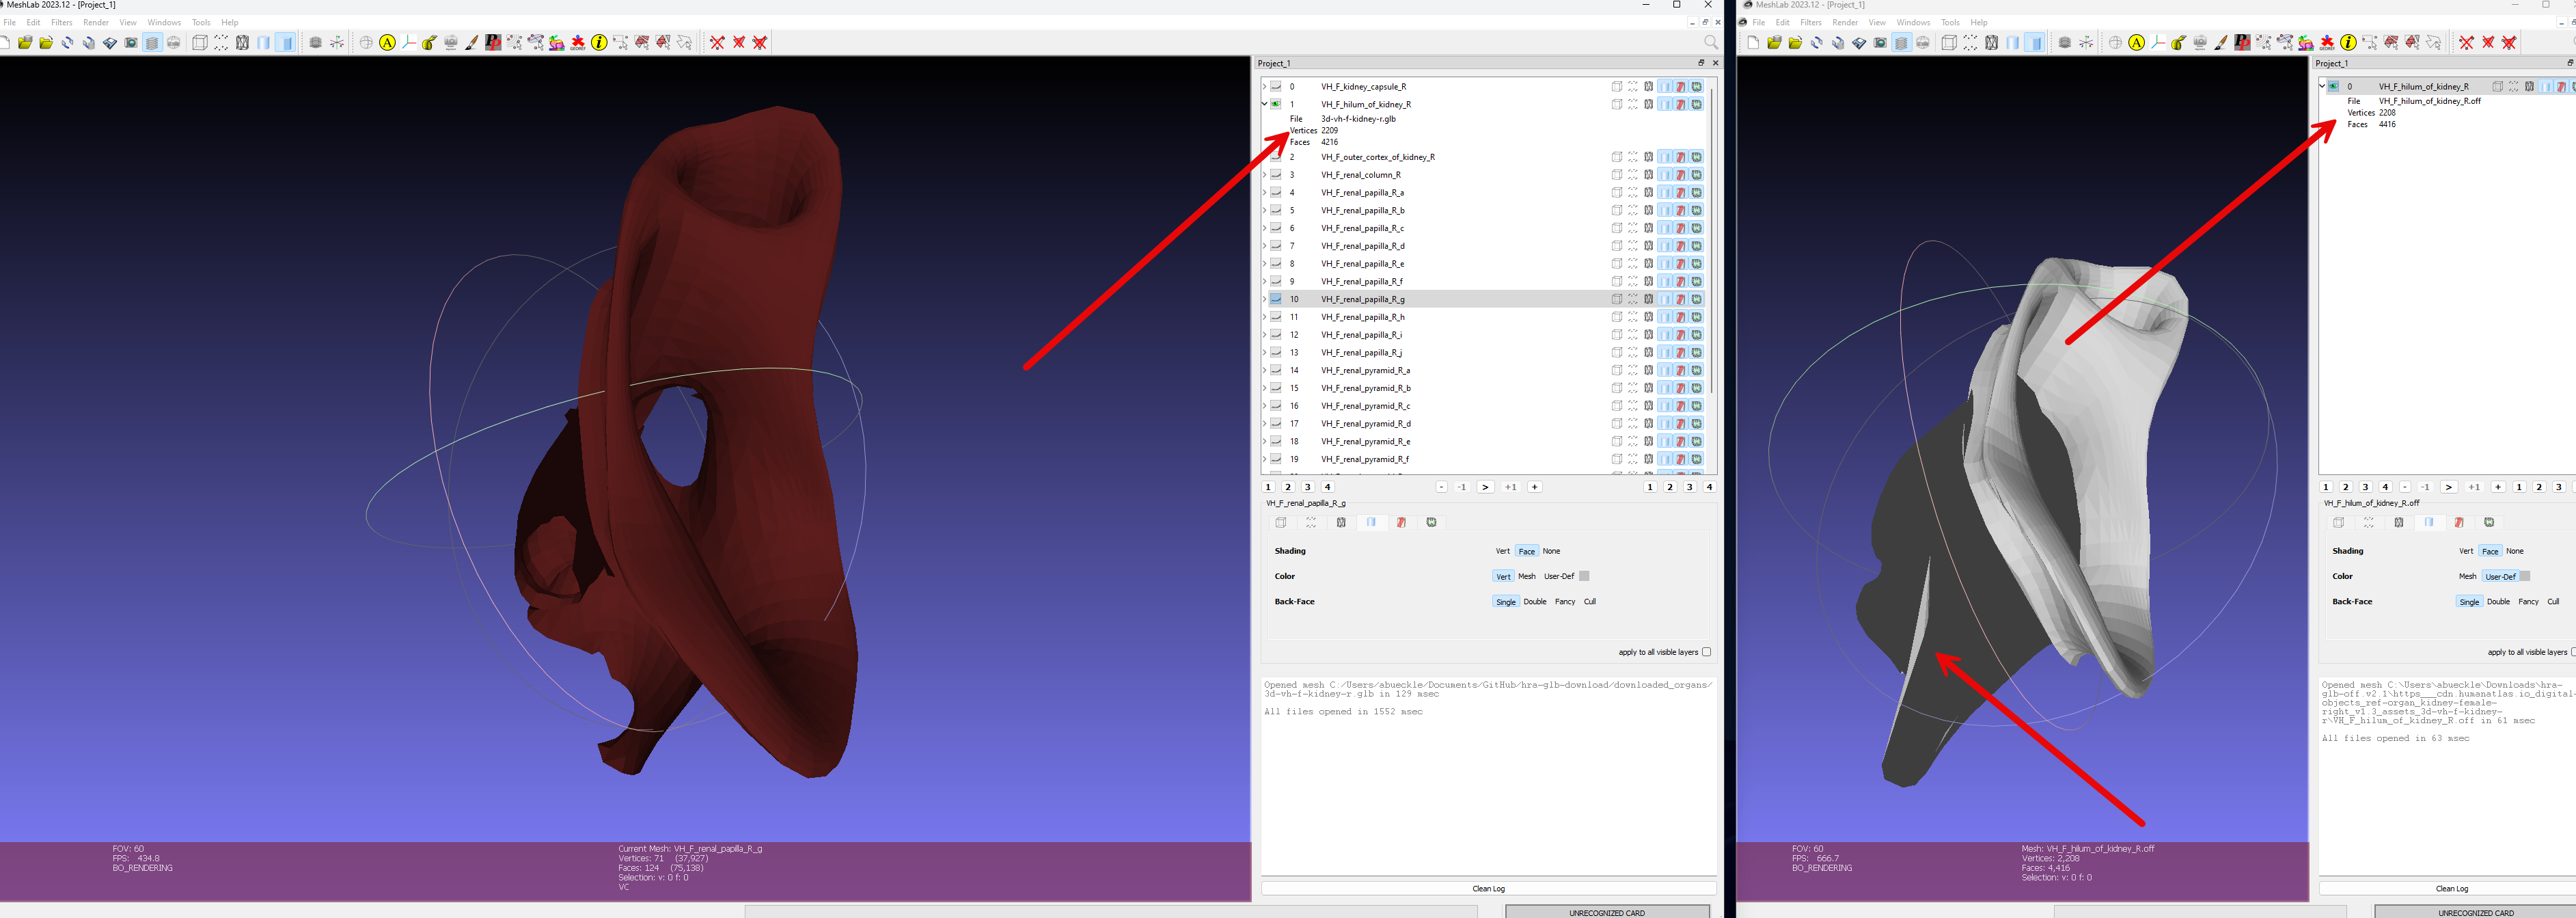

In [115]:
# get AS collisions
get_as_collision_items(
    "http://purl.org/ccf/1.5/7f7fe1b0-d9f6-48c2-a304-2ea5874c7392")

{'http://purl.obolibrary.org/obo/UBERON_0004200': 1,
 'http://purl.obolibrary.org/obo/UBERON_0002189': 0.04}

## Check for AS-AS collisions

In [86]:
query = '''
PREFIX cc: <http://creativecommons.org/ns#>
#+ summary: Table S2
#+ description: Anatomical Structures in HRA, their volume, and predicted CT populations

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ASCTB-TEMP: <https://purl.org/ccf/ASCTB-TEMP_>
PREFIX CL: <http://purl.obolibrary.org/obo/CL_>
PREFIX FMA: <http://purl.org/sig/ont/fma/fma>
PREFIX UBERON: <http://purl.obolibrary.org/obo/UBERON_>
PREFIX ccf: <http://purl.org/ccf/>
PREFIX CCF: <https://purl.humanatlas.io/graph/ccf>
PREFIX HRApop: <https://purl.humanatlas.io/graph/hra-pop>
PREFIX hra-pop: <https://purl.humanatlas.io/graph/hra-pop#>
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX hubmap: <https://entity.api.hubmapconsortium.org/entities/>
PREFIX rui: <http://purl.org/ccf/1.5/>

SELECT DISTINCT ?organ ?organ_id ?as_label ?as_3d_id ?scene_node ?as_volume 
FROM HRApop:
FROM CCF:
WHERE {
  {
    SELECT ?organ ?as_label (SAMPLE(?as_3d_id) as ?as_3d_id) (SAMPLE(?scene_node) as ?scene_node) (AVG(?as_volume) as ?as_volume)
    WHERE {
      ?rui_location a ccf:SpatialEntity .
      ?rui_location ccf:has_collision_summary [
          ccf:has_collision_item [
            ccf:as_id ?as_id ;
            ccf:as_label ?as_label ;
            ccf:as_volume ?as_volume ;
			ccf:as_3d_id ?as_3d_id ;
            ccf:has_reference_organ ?ref_organ ;
          ]
      ] .
      ?as_3d_id ccf:has_object_reference [
      	ccf:file_subpath ?scene_node ;
      ] .
      BIND (REPLACE(REPLACE(REPLACE(STR(?ref_organ), "http://purl.org/ccf/latest/ccf.owl#", ""), "Colon", "LargeIntestine"), "V1.1", "") as ?organ)
    }
    GROUP BY ?organ ?as_label
  }

  {
    SELECT ?organ ?organ_id
    WHERE {
      ?ref_organ ccf:representation_of ?organ_iri .

      BIND (REPLACE(REPLACE(STR(?organ_iri), 'http://purl.obolibrary.org/obo/UBERON_', 'UBERON:'), 'http://purl.org/sig/ont/fma/fma', 'FMA:') as ?organ_id)
      BIND (REPLACE(REPLACE(REPLACE(STR(?ref_organ), "http://purl.org/ccf/latest/ccf.owl#", ""), "Colon", "LargeIntestine"), "V1.1", "") as ?organ)
    }
  }
  

}
ORDER BY ?organ ?as_label

'''

In [87]:
request = {"query": query}
# use only application/json in format, any other formats will result in errors.
try:
    # help(api_instance.sparql_post)
    api_response = api_instance.sparql_post(
        sparql_query_request=request, format='application/json')
    pprint(api_response)
except hra_api_client.ApiException as e:
    print("Exception when calling DefaultApi->sparql_post: %s\n" % e)

{'head': {'vars': ['organ',
                   'organ_id',
                   'as_label',
                   'as_3d_id',
                   'scene_node',
                   'as_volume']},
 'results': {'bindings': [{'as_3d_id': {'type': 'uri',
                                        'value': 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_papillary_muscle_of_heart_posmed'},
                           'as_label': {'datatype': 'http://www.w3.org/2001/XMLSchema#string',
                                        'type': 'literal',
                                        'value': 'Posteromedial head of '
                                                 'posterior papillary muscle '
                                                 'of left ventricle'},
                           'as_volume': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
                                         'type': 'literal',
                                         'value': '4401.499'},
                   

In [88]:
# get as_3d_id

unique_as_3d_id_hra_pop = set()

for item in api_response['results']['bindings']:
  unique_as_3d_id_hra_pop.add(item['as_3d_id']['value'])
  
pprint(unique_as_3d_id_hra_pop)

{'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_ascending_colon',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_caecum',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_descending_colon',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_diaphragmatic_surface_of_spleen',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_duodenum_ascending',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_duodenum_descending',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_duodenum_horizontal',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_duodenum_superior',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_fat_R',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_fundus_of_urinary_bladder_base',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_hilum_of_kidney_L',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_hilum_of_spleen',
 'http://purl.org/ccf/latest/ccf.owl#VHFemaleOrgans_VH_F_ileum',
 'http:

In [89]:
# load CSV from https://github.com/hubmapconsortium/hra-glb-mesh-collisions

as_as_collisions = pd.read_csv("data/collision_results.csv")
# pprint(as_as_collisions)

df_as_mesh = pd.DataFrame(as_as_collisions)

df_as_mesh


# Initialize a list to store results
check_result = []

# Apply a lambda function that checks if any substring in the set is part of the value
df_as_mesh['in_hra_pop'] = df_as_mesh['source'].apply(
    lambda x: any(substring in x for substring in unique_as_3d_id_hra_pop))

df_as_mesh

df_as_mesh.to_csv("output/df_as_mesh.csv")

# Old

### CTann vs RUI cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary &#x2705;


In [90]:
# Correlation
stats = df_subset[['ctann_sim', 'rui_sim_by_cell_summary']]
stats.corr(min_periods=3)

,ctann_sim,rui_sim_by_cell_summary
ctann_sim,1.000000,0.680724
rui_sim_by_cell_summary,0.680724,1.000000


In [91]:
# Mean, STDDEV, min, etc.
stats.describe()

,ctann_sim,rui_sim_by_cell_summary
count,898.000000,898.000000
mean,0.832648,0.869627
std,0.159287,0.133640
min,0.117205,0.151411
25%,0.743555,0.811778
50%,0.886364,0.914306
75%,0.953453,0.965113
max,1.000000,1.000000


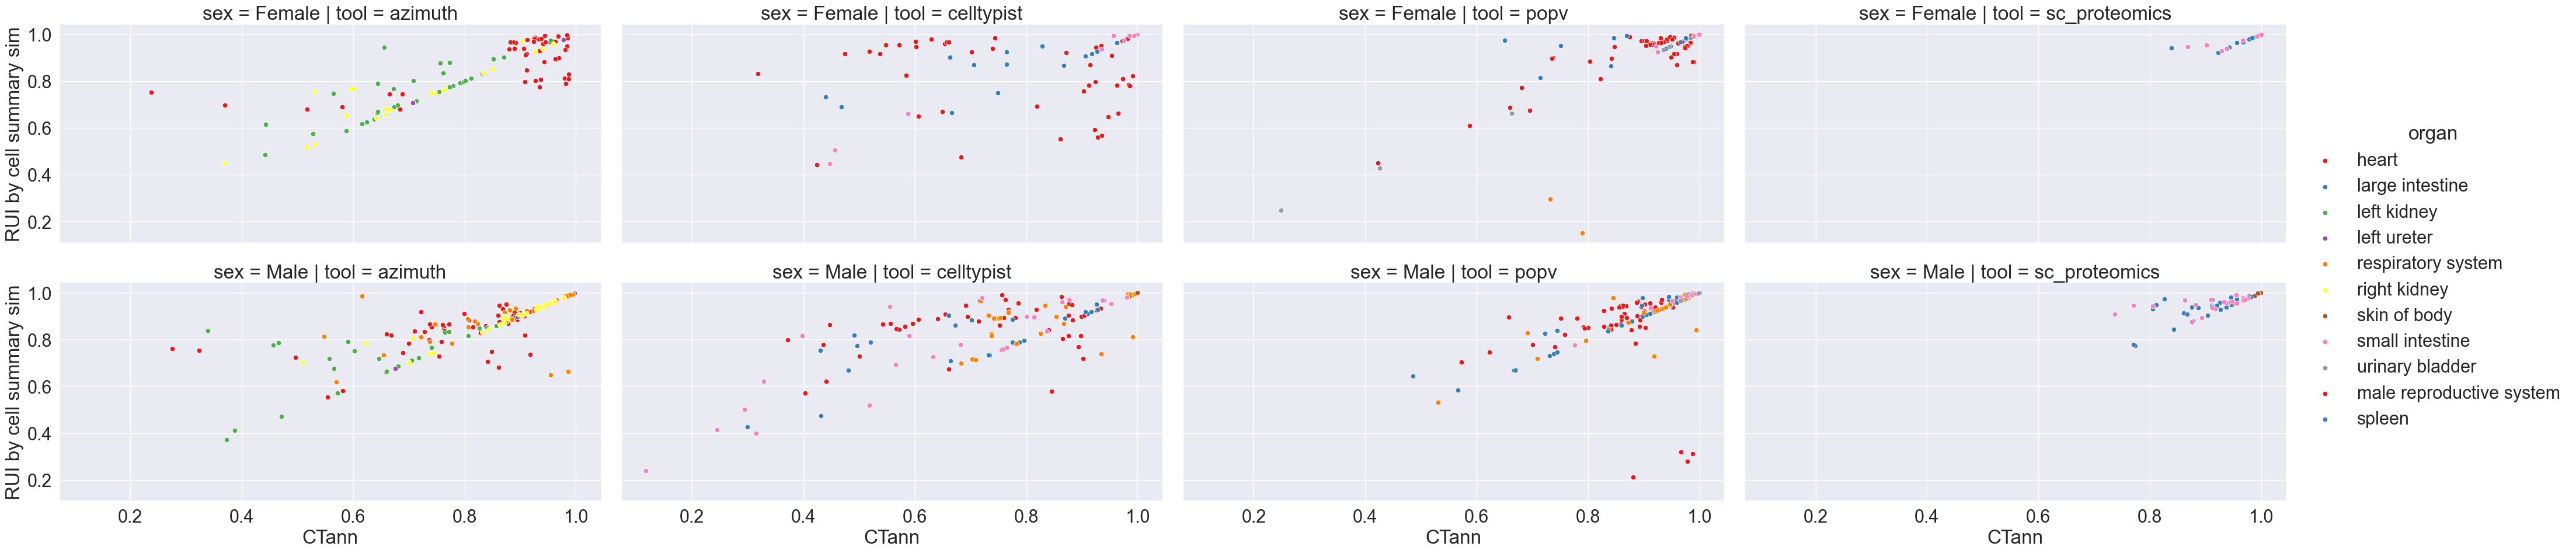

In [92]:
make_validation_scattergraph(
  "ctann_sim", "rui_sim_by_cell_summary", "Set1", "tool", "sex", "organ", "CTann", "RUI by cell summary sim")